In [ ]:
%reset

# 1. Imports

In [ ]:
import mne
import time
import os
import numpy as np
import custom_modules.xdf_to_fif_converter as xtfc
import custom_modules.preprocessing_ptu as prep
import custom_modules.file_handling as  fh

import importlib
importlib.reload(xtfc)
importlib.reload(prep)
importlib.reload(fh)

In [ ]:
mne.__version__

# 2. Constants

In [ ]:
data_path = 'D:/Diplomarbeit_data/eeg/'
subjects = ['A01', 'A02', 'A03', 'A04', 'A05', 'A06', 'A07' , 'A08', 'A09', 'A10']
trial_type_markers = ['LTR-s', 'LTR-l','RTL-s', 'RTL-l', 'TTB-s', 'TTB-l', 'BTT-s', 'BTT-l']

mne.set_log_level('WARNING') #'INFO' 'WARNING'

# 3. XDF --> FIF
The following cell reads all xdf-files containing the raw eeg and loads them into the mne structure and stores them as .fif-files.

In [ ]:
help(xtfc.xdf_to_fif)

In [ ]:
# Get source and destination path + create destintation folder if it does not exist.
src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='raw', dst_fldr='raw_fif')

# Iterate over each subject and extract the streams
start = time.time()
for i, subject in enumerate(subjects):
    print(f'Extracting subject {subject}', end=' ')

    # Call the xdf_to_fif function from the xtfc module which takes care of converting the xdf files to fif files:
    xtfc.xdf_to_fif(src_path, dst_path, subject)

    print()

print(f'Finished reading, took me {round(time.time()-start)} seconds...')

# 4. Concatenate all fif files for each subject

In [ ]:
help(prep.concat_fifs)

In [ ]:
# Get source and destination path + create destintation folder if it does not exist.
src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='raw_fif', dst_fldr='concat')

# Iterate over each subject and extract the streams
start = time.time()
for i, subject in enumerate(subjects):
    print(f'Reading all fif files for subject {subject}', end=' ')

    # Concatenate all raw files for the paradigm and the eye paradigm:
    prep.concat_fifs(src=src_path, dst=dst_path, sbj=subject, paradigm='paradigm')
    prep.concat_fifs(src=src_path, dst=dst_path, sbj=subject, paradigm='eye')
    print()

print(f'Finished concatenating, took me {round(time.time() - start)} seconds...')

# 5. Filter  the data (HP 0.4 Hz and Notch 50 Hz)

In [ ]:
help(prep.filter_fifs)

In [ ]:
# Get source and destination path + create destintation folder if it does not exist.
src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='concat', dst_fldr='filtered')

# Iterate over each subject and extract the streams
start = time.time()
for i, subject in enumerate(subjects):
    print(f'Filtering raw EEG for subject {subject}')

    # Concatenate all raw files for the paradigm and the eye paradigm:
    prep.filter_fifs(src=src_path, dst=dst_path, sbj=subject, paradigm='paradigm')
    prep.filter_fifs(src=src_path, dst=dst_path, sbj=subject, paradigm='eye')

print(f'Finished filtering, took me {round(time.time() - start)} seconds...')

# 6. Interpolate bad channels

In this cell the bad channels are interpolated based on visual inspection. The visual inspection was performed prior and the channels are stored in ***/dataframes/preprocessing/bad_channels.csv***

In [ ]:
help(prep.interpolate_bads)

In [ ]:
# Get source and destination path + create destintation folder if it does not exist.
src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='filtered', dst_fldr='bad_ch_interpolated')

# Iterate over each subject and extract the streams
start = time.time()
for i, subject in enumerate(subjects):
    print(f'Interpolating bad channels for subject {subject}')

    # Interpolate bad channels for all raw files for the paradigm and the eye paradigm:
    prep.interpolate_bads(src=src_path, dst=dst_path, sbj=subject, paradigm='paradigm')
    prep.interpolate_bads(src=src_path, dst=dst_path, sbj=subject, paradigm='eye')

print(f'Finished interpolating, took me {round(time.time() - start)} seconds...')

# 7. CAR

In [ ]:
# Get source and destination path + create destintation folder if it does not exist.
src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='bad_ch_interpolated', dst_fldr='car_filtered')

# Iterate over each subject and extract the streams
start = time.time()
for i, subject in enumerate(subjects):
    print(f'Re-referencing for subject {subject}')

    # Concatenate all raw files for the paradigm:
    prep.car(src=src_path, dst=dst_path, sbj=subject, paradigm='paradigm')

print(f'Finished interpolating, took me {round(time.time() - start)} seconds...')

# 8. Mark bad dataspans
Mark bad dataspans due to user errors in paradigm.

In [ ]:
# Get source and destination path + create destintation folder if it does not exist.
src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='car_filtered', dst_fldr='bad_dataspans_marked')

# Iterate over each subject and extract the streams
start = time.time()
for i, subject in enumerate(subjects):
    print(f'Marking bad dataspans for outlier detection for subject {subject}')

    # Concatenate all raw files for the paradigm:
    prep.mark_bad_dataspans(src=src_path, dst=dst_path, sbj=subject, paradigm='paradigm')

print(f'Finished interpolating, took me {round(time.time() - start)} seconds...')

# 9. Epoching for outlier detection

In [ ]:
# Get source and destination path + create destintation folder if it does not exist.
src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='bad_dataspans_marked', dst_fldr='epoched_for_outlier_detection')

# Iterate over each subject and extract the streams
start = time.time()
for i, subject in enumerate(subjects):
    print(f'Epoching for outlier detection for subject {subject}')

    # Concatenate all raw files for the paradigm:
    prep.epoch_for_outlier_detection(src=src_path, dst=dst_path, sbj=subject, paradigm='paradigm')

print(f'Finished interpolating, took me {round(time.time() - start)} seconds...')

## 9.1. Visualize epochs

In [ ]:
# Get source and destination path + create destintation folder if it does not exist.
src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='epoched_movement_aligned', dst_fldr='epoched_for_outlier_detection')

sbj_to_vis = 'A01'

# Visualize epochs for subject:
epochs = prep.vis_epochs_for_sbj(src=src_path, sbj=sbj_to_vis)
fig = epochs[9].plot(picks=['eeg', 'eog'])

# 10. Lowpass filtering

In [ ]:
# Get source and destination path + create destintation folder if it does not exist.
src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='bad_dataspans_marked', dst_fldr='lowpass_filtered')

# Iterate over each subject and extract the streams
start = time.time()
for i, subject in enumerate(subjects):
    print(f'Lowpass filter for subject {subject}')

    # Lowpass filter all raw files for the paradigm:
    prep.lowpass_filter(src=src_path, dst=dst_path, sbj=subject, paradigm='paradigm')

print(f'Finished lowpass filtering, took me {round(time.time() - start)} seconds...')

# 11. Epoch and resample:

## 11.1. Cue-aligned

In [ ]:
# Get source and destination path + create destintation folder if it does not exist.
src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='lowpass_filtered', dst_fldr='epoched_cue_aligned')

# Iterate over each subject and extract the streams
start = time.time()
for i, subject in enumerate(subjects):
    print(f'Epoching cue-aligned for subject {subject}')

    # Epoch all raw files for the paradigm:
    prep.epoch_and_resample(src=src_path, dst=dst_path, sbj=subject, paradigm='paradigm', cue_aligned=True)

print(f'Finished epoching, took me {round(time.time() - start)} seconds...')

## 11.2. Movement-onset aligned

In [ ]:
# Get source and destination path + create destintation folder if it does not exist.
src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='lowpass_filtered', dst_fldr='epoched_movement_aligned')

# Iterate over each subject and extract the streams
start = time.time()
for i, subject in enumerate(subjects):
    print(f'Epoching movement-aligned for subject {subject}')

    # Epoch all raw files for the paradigm:
    prep.epoch_and_resample(src=src_path, dst=dst_path, sbj=subject, paradigm='paradigm', cue_aligned=False)

print(f'Finished epoching, took me {round(time.time() - start)} seconds...')

# 12. Epoch for plotting (without downsampling):

## 12.1. Cue-aligned

In [ ]:
# Get source and destination path + create destintation folder if it does not exist.
src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='lowpass_filtered', dst_fldr='epoched_cue_aligned_not_resampled')

# Iterate over each subject and extract the streams
start = time.time()
for i, subject in enumerate(subjects):
    print(f'Epoching cue-aligned for subject {subject}')

    # Epoch all raw files for the paradigm:
    prep.epoch_and_resample(src=src_path, dst=dst_path, sbj=subject, paradigm='paradigm', cue_aligned=True, resample=False)

print(f'Finished epoching, took me {round(time.time() - start)} seconds...')

In [ ]:
# Keep this line while editing in preprocessing:
importlib.reload(prep)

# Plot cue-aligned grand average:
src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='epoched_cue_aligned_not_resampled', dst_fldr='results_epoched_cue_aligned')

prep.plot_grand_average(src=src_path, dst=dst_path, sbj_list=subjects, paradigm='paradigm', split=[''])

prep.plot_grand_average(src=src_path, dst=dst_path, sbj_list=subjects, paradigm='paradigm', split=['long', 'short'])

prep.plot_grand_average(src=src_path, dst=dst_path, sbj_list=subjects, paradigm='paradigm', split=['up', 'down', 'left', 'right'])

times_of_interest = [0.9, 1.5, 2.0, 2.1, 2.2, 2.3]

prep.plot_topomaps(src=src_path, dst=dst_path, sbj_list=subjects, paradigm='paradigm', split=[''], times=times_of_interest)

prep.plot_topomaps(src=src_path, dst=dst_path, sbj_list=subjects, paradigm='paradigm', split=['long', 'short'], times=times_of_interest)

prep.plot_topomaps(src=src_path, dst=dst_path, sbj_list=subjects, paradigm='paradigm', split=['up', 'down', 'left', 'right'], times=times_of_interest)


C:\Users\peter\Documents\Code\master-thesis\03_analysis\custom_modules\preprocessing_ptu.py:935: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  fig = mne.concatenate_epochs(epochs_lst[i]).average().plot_topomap(times, ch_type='eeg',
C:\Users\peter\Documents\Code\master-thesis\03_analysis\custom_modules\preprocessing_ptu.py:935: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  fig = mne.concatenate_epochs(epochs_lst[i]).average().plot_topomap(times, ch_type='eeg',
C:\Users\peter\Documents\Code\master-thesis\03_analysis\custom_modules\preprocessing_ptu.py:935: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  fig = mne.concatenate_epochs(epochs_lst[i]).average().plot_topomap(times, ch_type='eeg',
C:\Users\peter\Documents\Code\master-thesis\03_analysis\custom_modules\preprocessing_ptu.py:93

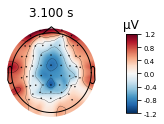

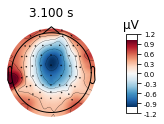

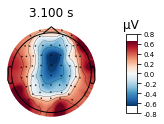

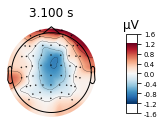

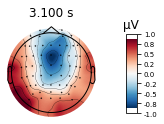

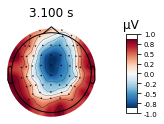

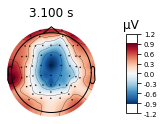

In [126]:
# Keep this line while editing in preprocessing:
importlib.reload(prep)

# Plot cue-aligned grand average:
src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='epoched_cue_aligned_not_resampled', dst_fldr='results_epoched_cue_aligned_after_coeff_testing')

# Based on coefficient testing topoplot at 3.1s
times_of_interest = [3.1]

prep.plot_topomaps(src=src_path, dst=dst_path, sbj_list=subjects, paradigm='paradigm', split=[''], times=times_of_interest)

prep.plot_topomaps(src=src_path, dst=dst_path, sbj_list=subjects, paradigm='paradigm', split=['long', 'short'], times=times_of_interest)

prep.plot_topomaps(src=src_path, dst=dst_path, sbj_list=subjects, paradigm='paradigm', split=['up', 'down', 'left', 'right'], times=times_of_interest)

## 12.1. Movement-aligned

In [ ]:
# Get source and destination path + create destintation folder if it does not exist.
src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='lowpass_filtered', dst_fldr='epoched_movement_aligned_not_resampled')

# Iterate over each subject and extract the streams
start = time.time()
for i, subject in enumerate(subjects):
    print(f'Epoching movement-aligned for subject {subject}')

    # Epoch all raw files for the paradigm:
    prep.epoch_and_resample(src=src_path, dst=dst_path, sbj=subject, paradigm='paradigm', cue_aligned=False, resample=False)

print(f'Finished epoching, took me {round(time.time() - start)} seconds...')

In [ ]:
# Plot movement-aligned grand average:
# Keep this line while editing in preprocessing:
importlib.reload(prep)

# Plot cue-aligned grand average:
src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='epoched_movement_aligned_not_resampled', dst_fldr='results_epoched_movement_aligned')

epochs = prep.plot_grand_average(src=src_path, dst=dst_path, sbj_list=subjects, paradigm='paradigm', split=[''])

prep.plot_grand_average(src=src_path, dst=dst_path, sbj_list=subjects, paradigm='paradigm', split=['long', 'short'])

prep.plot_grand_average(src=src_path, dst=dst_path, sbj_list=subjects, paradigm='paradigm', split=['up', 'down', 'left', 'right'])

times_of_interest = [-0.1, 0.0, 0.1, 0.2, 0.3, 0.4, 0.5]

prep.plot_topomaps(src=src_path, dst=dst_path, sbj_list=subjects, paradigm='paradigm', split=[''], times=times_of_interest)

prep.plot_topomaps(src=src_path, dst=dst_path, sbj_list=subjects, paradigm='paradigm', split=['long', 'short'], times=times_of_interest)

prep.plot_topomaps(src=src_path, dst=dst_path, sbj_list=subjects, paradigm='paradigm', split=['up', 'down', 'left', 'right'], times=times_of_interest)

C:\Users\peter\Documents\Code\master-thesis\03_analysis\custom_modules\preprocessing_ptu.py:935: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  fig = mne.concatenate_epochs(epochs_lst[i]).average().plot_topomap(times, ch_type='eeg',
C:\Users\peter\Documents\Code\master-thesis\03_analysis\custom_modules\preprocessing_ptu.py:935: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  fig = mne.concatenate_epochs(epochs_lst[i]).average().plot_topomap(times, ch_type='eeg',
C:\Users\peter\Documents\Code\master-thesis\03_analysis\custom_modules\preprocessing_ptu.py:935: RuntimeWarning: Concatenation of Annotations within Epochs is not supported yet. All annotations will be dropped.
  fig = mne.concatenate_epochs(epochs_lst[i]).average().plot_topomap(times, ch_type='eeg',
C:\Users\peter\Documents\Code\master-thesis\03_analysis\custom_modules\preprocessing_ptu.py:93

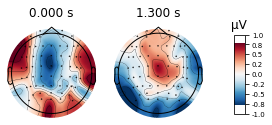

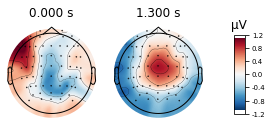

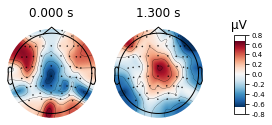

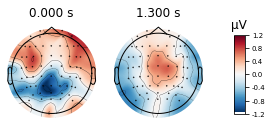

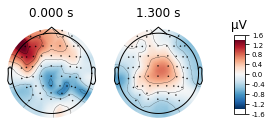

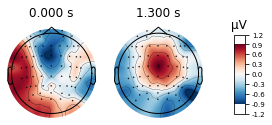

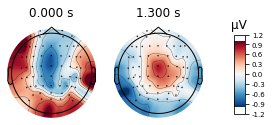

In [125]:
# Keep this line while editing in preprocessing:
importlib.reload(prep)

# Plot cue-aligned grand average:
src_path, dst_path = fh.gen_paths(pth=data_path, src_fldr='epoched_movement_aligned_not_resampled', dst_fldr='results_epoched_movement_aligned_after_coeff_testing')

# Based on coefficient testing topoplot at 3.1s
times_of_interest = [0.0, 1.3]

prep.plot_topomaps(src=src_path, dst=dst_path, sbj_list=subjects, paradigm='paradigm', split=[''], times=times_of_interest)

prep.plot_topomaps(src=src_path, dst=dst_path, sbj_list=subjects, paradigm='paradigm', split=['long', 'short'], times=times_of_interest)

prep.plot_topomaps(src=src_path, dst=dst_path, sbj_list=subjects, paradigm='paradigm', split=['up', 'down', 'left', 'right'], times=times_of_interest)

In [ ]:
# Get difference between cue onset and movement onset (*i*1):
trial_type_markers = ['LTR-s', 'LTR-l', 'RTL-s', 'RTL-l', 'TTB-s', 'TTB-l', 'BTT-s', 'BTT-l']
cue_times = []
release_times = []
touch_times = []
for i, entry in enumerate(epochs.annotations.description):
    if entry in trial_type_markers:
        if 'bad' in epochs.annotations.description[i+1]:
            continue
        else:
            # Get delay between cue which is 'Cue' at i+3 and ix1 at i+4 and cx0 at i+5
            cue_times.append(epochs.annotations.onset[i+3])
            release_times.append(epochs.annotations.onset[i+4])
            touch_times.append(epochs.annotations.onset[i+5])


In [ ]:
import numpy as np
diff_cue_release = np.array(release_times) - np.array(cue_times)
diff_release_touch = np.array(touch_times) - np.array(release_times)

In [ ]:
bins=np.arange(epochs.tmin, epochs.tmax, 1/epochs.info['sfreq'])
hist = np.histogram(diff_cue_release, bins=bins, range=None)

In [ ]:
kernel = gauss(n=55, b=0.04*epochs.info['sfreq'])

smoothed = np.convolve(hist[0], kernel, 'same')
x = np.arange(epochs.tmin, epochs.tmax+1/epochs.info['sfreq'], 1/epochs.info['sfreq'])
plt.plot(smoothed)
plt.show()

In [ ]:
def gauss(n=11,b=0.04):
    r = range(-int(n/2),int(n/2)+1)
    return [np.exp(-float(x)**2/(2*b**2)) for x in r]

In [ ]:
import matplotlib.pyplot as plt

plt.plot(smoothed)
plt.show()

In [ ]:
epochs.tmax

In [ ]:
trial_type_markers = ['LTR-s', 'LTR-l', 'RTL-s', 'RTL-l', 'TTB-s', 'TTB-l', 'BTT-s', 'BTT-l']
for i, entry in enumerate(descriptions):
    if entry in trial_type_markers:
        if 'bad' in descriptions[i+1]:
            continue
        else:
            trial_type = entry
            period = 'i'  # indication
            position = descriptions[i+2][2]
            state = descriptions[i+2][4]

            descriptions[i+2] = trial_type + '_' + period + position + state

            trial_type = entry
            period = 'i'  # indication
            position = descriptions[i+4][2]
            state = descriptions[i+4][4]

            descriptions[i+4] = trial_type + '_' + period + position + state

            trial_type = entry
            period = 'c'  # cue
            position = descriptions[i+5][2]
            state = descriptions[i+5][4]

            descriptions[i+5] = trial_type + '_' + period + position + state

            trial_type = entry
            period = 'c'  # cue
            position = descriptions[i+7][2]
            state = descriptions[i+7][4]

            descriptions[i+7] = trial_type + '_' + period + position + state

return descriptions